# Лабораторна робота №8. Структура даних граф. Алгоритми на графах.
# Підготував: Саєнко Олексій

### 1 . Для варіанта, заданого викладачем, задати і візуалізувати граф за допомогою коду, наведеного у цій роботі.
``` python
import networkx as nx 
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edges_from([
    ("A", "C", {"weight": 7}),
    ("A", "D", {"weight": 5}),
    ("B", "D", {"weight": 4}),
    ("B", "F", {"weight": 6}),
    ("C", "E", {"weight": 3}),
    ("D", "E", {"weight": 2}),
    ("E", "F", {"weight": 8}),
    ("A", "F", {"weight": 1})
])

pos = nx.spring_layout(G, seed=42)

weights = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=14)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_color='black')
plt.title("Модифікований зв'язний граф з новими вагами")
plt.show()
```

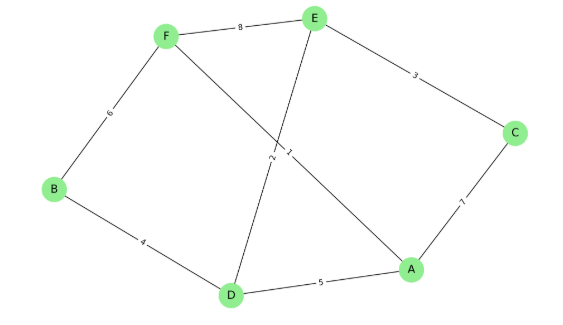

### 2. Для свого варіанту реалізувати всі алгоритми, згідно з прикладами, наведеними вище
``` python
import networkx as nx
import matplotlib.pyplot as plt

# === Create the modified graph ===
G = nx.Graph()
G.add_edges_from([
    ("A", "C", {"weight": 7}),
    ("A", "D", {"weight": 5}),
    ("B", "D", {"weight": 4}),
    ("B", "F", {"weight": 6}),
    ("C", "E", {"weight": 3}),
    ("D", "E", {"weight": 2}),
    ("E", "F", {"weight": 8}),
    ("A", "F", {"weight": 1})
])

pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

# === Dijkstra's Algorithm ===
source_node = 'A'
dijkstra_paths = nx.shortest_path(G, source=source_node, weight='weight')
dijkstra_lengths = nx.shortest_path_length(G, source=source_node, weight='weight')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightyellow', node_size=1800, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

path_edges = set()
for path in dijkstra_paths.values():
    for i in range(len(path) - 1):
        path_edges.add(tuple(sorted((path[i], path[i+1]))))

edge_colors = ['red' if tuple(sorted(e)) in path_edges else 'gray' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, width=2)

plt.title(f"Алгоритм Дейкстри (початкова вершина '{source_node}')")
plt.axis('off')
plt.show()

print(f"Найкоротші шляхи від вершини '{source_node}' (Дейкстра): {dijkstra_paths}")
print(f"Довжини шляхів: {dict(dijkstra_lengths)}")

# === Bellman-Ford Algorithm ===
bf_paths = nx.single_source_bellman_ford_path(G, source=source_node, weight='weight')
bf_lengths = nx.single_source_bellman_ford_path_length(G, source=source_node, weight='weight')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1800, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

path_edges_bf = set()
for path in bf_paths.values():
    for i in range(len(path) - 1):
        path_edges_bf.add(tuple(sorted((path[i], path[i+1]))))

edge_colors_bf = ['red' if tuple(sorted(e)) in path_edges_bf else 'gray' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors_bf, width=2)

plt.title(f"Алгоритм Беллмана-Форда (початкова вершина '{source_node}')")
plt.axis('off')
plt.show()

print(f"Найкоротші шляхи від вершини '{source_node}' (Беллман-Форд): {bf_paths}")
print(f"Довжини шляхів: {dict(bf_lengths)}")

# === DFS (Depth-First Search) ===
dfs_order = list(nx.dfs_preorder_nodes(G, source=source_node))
node_colors = ['lightskyblue' if node in dfs_order else 'lightgray' for node in G.nodes()]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Алгоритм DFS (початкова вершина '{source_node}')\nПорядок відвідування: {', '.join(dfs_order)}")
plt.axis('off')
plt.show()

print(f"Порядок відвідування вузлів (DFS з початкової вершини '{source_node}'): {dfs_order}")

# === BFS (All shortest paths to F) ===
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next_node in set(graph.adj[vertex].keys()) - set(path):
            if next_node == goal:
                yield path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))

target_node = 'F'
all_shortest_paths = list(bfs_paths(G, source_node, target_node))

node_colors = ['lightskyblue' if node in nx.shortest_path(G, source=source_node) else 'lightgray' for node in G.nodes()]
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Усі найкоротші шляхи BFS від '{source_node}' до '{target_node}'")
plt.axis('off')
plt.show()

if all_shortest_paths:
    print(f"Усі найкоротші шляхи (за кількістю ребер) від '{source_node}' до '{target_node}':")
    for path in all_shortest_paths:
        path_edges_with_weights = []
        for i in range(len(path) - 1):
            u, v = path[i], path[i+1]
            weight = G.get_edge_data(u, v).get('weight', 1)
            path_edges_with_weights.append(f"({u}, {v}, вага: {weight})")
        print(f"  Шлях: {path}, Ребра: {', '.join(path_edges_with_weights)}")
else:
    print(f"Шлях від '{source_node}' до '{target_node}' не знайдено за допомогою BFS.")
```

### 2 . Для свого варіанта реалізувати всі алгоритми, згідно з прикладами, наведеними вище.


### Дейкстра


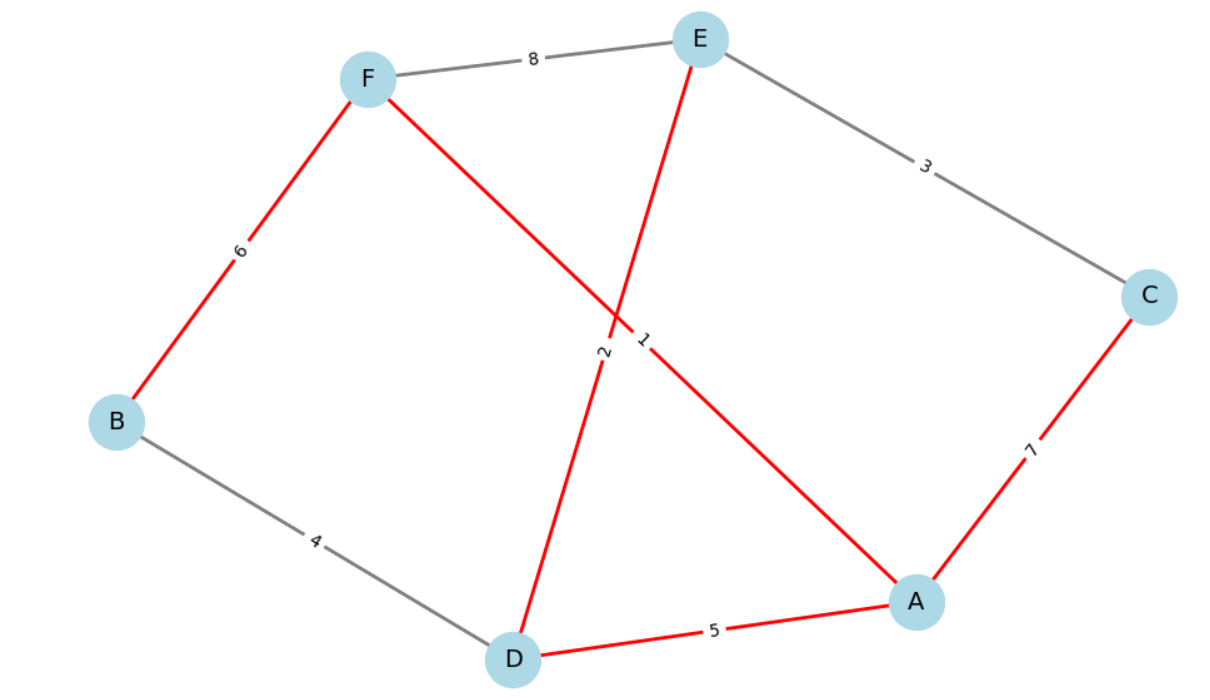

Найкоротші шляхи від вершини 'A' (Дейкстра): {'A': ['A'], 'B': ['A', 'D', 'B'], 'F': ['A', 'F'], 'C': ['A', 'D', 'E', 'C'], 'E': ['A', 'D', 'E'], 'D': ['A', 'D']} Довжини шляхів: {'A': 0, 'B': 9, 'F': 1, 'C': 10, 'E': 7, 'D': 5}

### Беллман-Форд


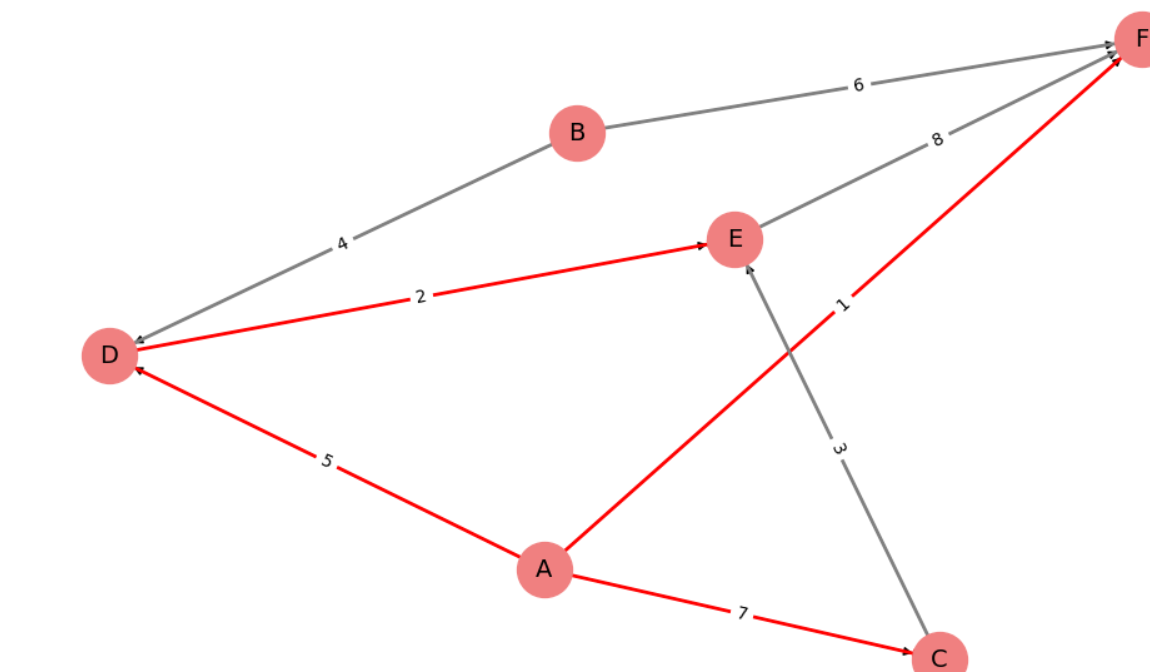

Найкоротші шляхи від вершини 'A' (Беллман-Форд):{'A': ['A'], 'B': ['A', 'D', 'B'], 'C': ['A', 'D', 'E', 'C'], 'D': ['A', 'D'], 'E': ['A', 'D', 'E'], 'F': ['A', 'F']}
Довжини шляхів:{'A': 0, 'B': 9, 'C': 10, 'D': 5, 'E': 7, 'F': 1}

### DFS

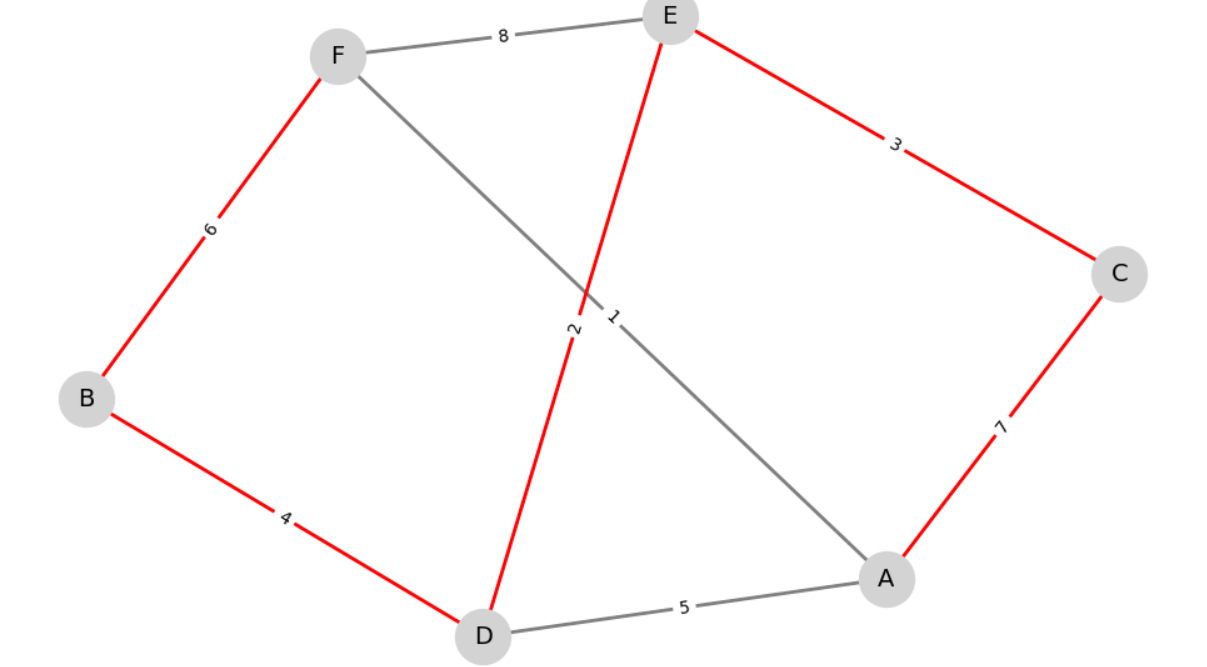

Обхід у глибину (DFS) з вершини 'A':['A', 'C', 'E', 'D', 'B', 'F']
Ребра, за якими йде DFS:[('A', 'C'), ('C', 'E'), ('E', 'D'), ('D', 'B'), ('B', 'F')]

### BFS

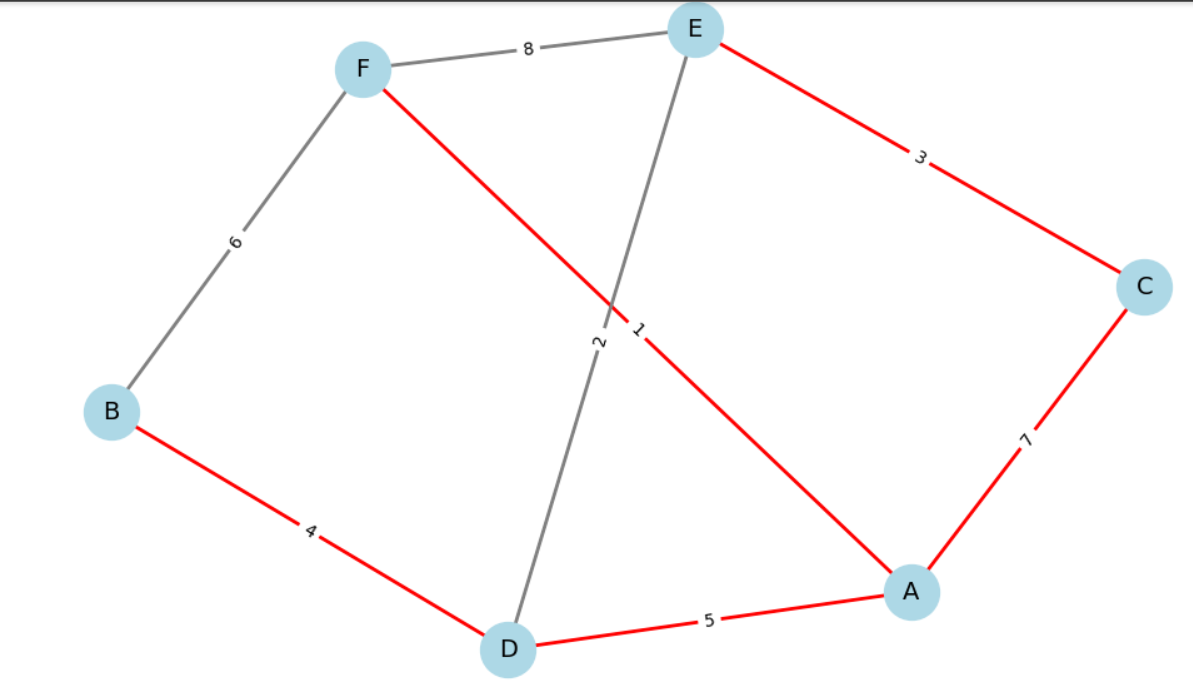

In [18]:
Обхід у ширину (BFS) з вершини 'A':['A', 'C', 'D', 'F', 'E', 'B']
Ребра, за якими йде BFS:[('A', 'C'), ('A', 'D'), ('A', 'F'), ('C', 'E'), ('D', 'B')]

SyntaxError: invalid syntax (2581620968.py, line 1)

## 3. Контрольні питання
- Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи. Граф — це множина вершин і ребер, які з’єднують ці вершини. Приклади: дорожня мережа, соціальні мережі, маршрути доставки.

- Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами. Існують орієнтовані, неорієнтовані, зважені, незважені, зв'язні, деревоподібні графи. У орієнтованому графі ребра мають напрям, у неорієнтованому — ні.

- Як можна представити граф у пам’яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів. Граф можна представити матрицею суміжності або списком суміжності. Список ефективніший для розріджених графів.

- Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм. BFS обходить граф рівнями, починаючи з вершини. Застосовується для знаходження найкоротших шляхів у незважених графах, перевірки зв'язності.

- Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS. DFS заглиблюється в граф до останньої вершини, потім повертається. На відміну від BFS, DFS використовує стек. Застосовується у пошуку компонент зв’язності, перевірці циклів.

- Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму? Алгоритм Дейкстри знаходить найкоротші шляхи від однієї вершини до всіх інших у зваженому графі. Працює тільки з не-негативними вагами ребер.